In [97]:
import os
import numpy as np
import pandas as pd
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns



dir_data = 'data'
dir_output = 'output'

df = pd.read_csv(os.path.join(dir_data, 'herodata.csv'))
df = df.loc[df['role'] != 'Support']
df = df.drop(['speed', 'sight', 'life_scale', 'life_regenScale', 'weapon_damageScale'], axis=1)

# keep most important features
# df = df[['hero', 'role', 'rating_damage', 'life_regenRate', 'life_amount']]
# df = df[['hero', 'role', 'rating_damage', 'life_regenRate', 'life_amount', 'weapon_range']]


X = df.drop(['hero', 'role'], axis=1)   # features
y = df[['role']]                        # labels

In [98]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [108]:
### Random Forest ###
rf = RandomForestClassifier(n_estimators=500, max_depth=3).fit(X_train, y_train)

# Predict the response 
rf_train_pred = rf.predict(X_train)
rf_test_pred = rf.predict(X_test)

# Model Accuracy
print("Accuracy on Test Data:", metrics.accuracy_score(y_train, rf_train_pred))
print("Accuracy on Training Data:", metrics.accuracy_score(y_test, rf_test_pred))

# print results of predict
# print('Actual - Prediction')
# for yt, yp in zip(y_test.to_numpy(), y_pred):
#     print(yt[0], '-', yp)




C:\Users\bxjxr\AppData\Local\Temp/ipykernel_2156/1445283906.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestClassifier(n_estimators=500, max_depth=3).fit(X_train, y_train)


Accuracy on Test Data: 0.9322033898305084
Accuracy on Training Data: 0.6923076923076923


No handles with labels found to put in legend.


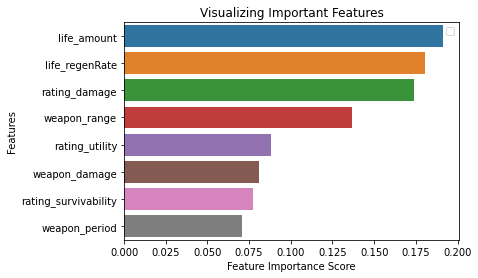

In [100]:
# Evaluate Feature importance
feature_imp = pd.Series(clf.feature_importances_, index=df.columns[2:]).sort_values(ascending=False)

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [101]:
# save model to disk
pickle.dump(clf, open('rf_model.sav', 'wb'))

In [102]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
gnb_train_pred = gnb.predict(X_train)
gnb_test_pred = gnb.predict(X_test)
print("Accuracy on Test Data:", metrics.accuracy_score(y_train, gnb_train_pred))
print("Accuracy on Training Data:", metrics.accuracy_score(y_test, gnb_test_pred))

c:\Users\bxjxr\Desktop\Projects\hots-classifier-app\env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy on Test Data: 0.9322033898305084
Accuracy on Training Data: 0.7307692307692307


In [103]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB().fit(X_train, y_train)
mnb_train_pred = mnb.predict(X_train)
mnb_test_pred = mnb.predict(X_test)
print("Accuracy on Test Data:", metrics.accuracy_score(y_train, mnb_train_pred))
print("Accuracy on Training Data:", metrics.accuracy_score(y_test, mnb_test_pred))

Accuracy on Test Data: 0.6101694915254238
Accuracy on Training Data: 0.5384615384615384


c:\Users\bxjxr\Desktop\Projects\hots-classifier-app\env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
